# Transforming Random Variables

Be sure to import Symbulate using the following commands.

In [1]:
from symbulate import *
%matplotlib inline

### Functions of a random variable

In the simulation world we can revist the idea of performing transformations on our random variables. Now we are thinking of our RVs as a vector of random values, to which we want to perform some operation 

*Remember,* A transformation of a random variable is also a random variable.  If $X$ is a random variable and $g$ is function, define a new random variable $Y=g(X)$.

For a single varaible this looks very similar to what we have discussed before: we use either `.apply()` or simply apply the function to the variable ourselves. Some use cases are displayed below. Notice how `.apply()` can always be used - this function simply applies whatever function you put inbetween the parenthesis to each item in the vector.  

*Example.* If $X$ has a normal distribution, then $e^X$ has a *lognormal* distribution.

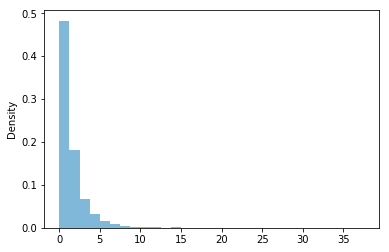

In [15]:
X = RV(Normal(mean=0, var=1))
Y = exp(X) # same as X.apply(exp)
Y.sim(10000).plot()

*Example.* If $U$ has a Uniform(0,1) distribution then $-\log(1-U)$ has an Exponential(1) distribution.

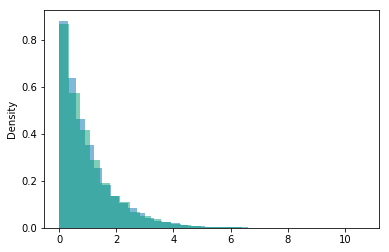

In [16]:
U = RV(Uniform(a=0, b=1))
X = -log(1 - U)
X.sim(10000).plot(alpha=0.5)
RV(Exponential(1)).sim(10000).plot(alpha=0.5)

*Example.* A user defined function with `.apply()`

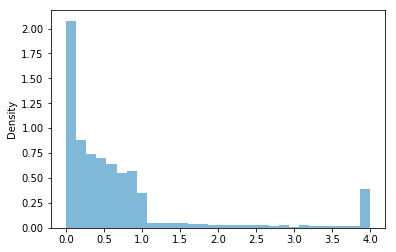

In [17]:
def g(x):
    return min(abs(x - 1), 2)**2

X = RV(Exponential(rate = 1))
Y = X.apply(g)
Y.sim(10000).plot()

### Transformations of multiple RVs

In the simulation world we might think to something like the following: 

```
X = RV(Binomial(5,.5)).sim(100)
Y = RV(Poisson(1)).sim(100)
X+Y
```


While it may make sense to us to add values of these two random variables because we assume independence, there is no way for Symbulate to know that is what we are doing. Instead we can create two vectors of independent RVs using the `*` operator and slicing, and then simply apply functions to these vectors like we have before.

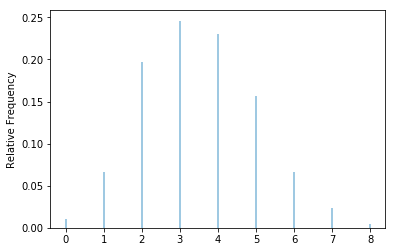

In [4]:
XY = RV(Binomial(5,.5)* Poisson(1)).sim(1000)
X = XY[0]
Y = XY[1]
(X+Y).plot()

Sometimes we are only able to perform the transformation we want by using the `apply` function. 

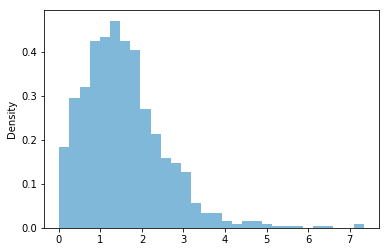

In [6]:
XY = RV(Exponential(1)* Normal(1,1)).sim(1000) 
R = (XY).apply(max)
R.plot()

The above is possible because we know XY is created as a vector of tuples to which we apply the `max` function. 

Note that similarly we could define our own function to apply to a vector of groups of values. 